# Satellite Image Classification

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
# Suppress TensorFlow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # 0=all, 1=info, 2=warning, 3=error
os.environ['TF_ENABLE_ONEDNN_OPTS'] = '0'  # Disable oneDNN custom operations
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [15]:
# Setting constraints
path = "./data/"
batch_size = 32
height = 72
width = 128

In [16]:
# Loading and splitting the dataset
train = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=(height, width),
    batch_size=batch_size
)

test = tf.keras.utils.image_dataset_from_directory(
    path,
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=(height, width),
    batch_size=batch_size
)

Found 5631 files belonging to 4 classes.
Using 4505 files for training.
Found 5631 files belonging to 4 classes.
Using 1126 files for validation.


2025-03-20 17:50:52.777723: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


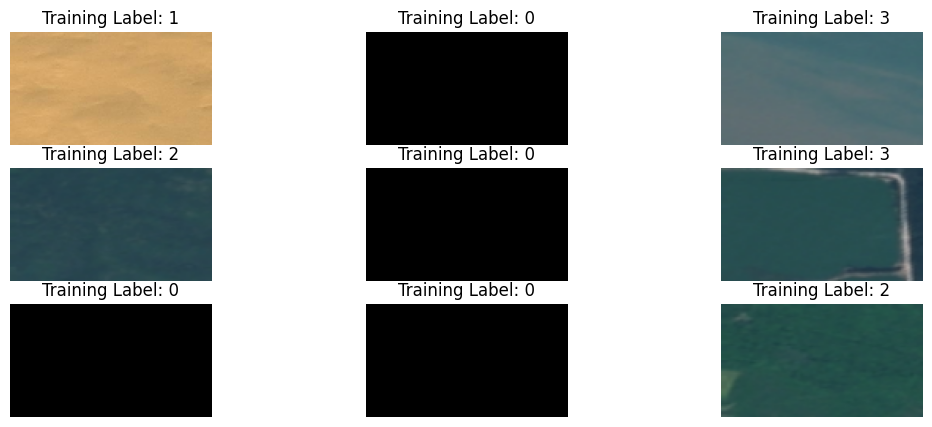

In [17]:
# Print the first few training images
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(train.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j+1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Training Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

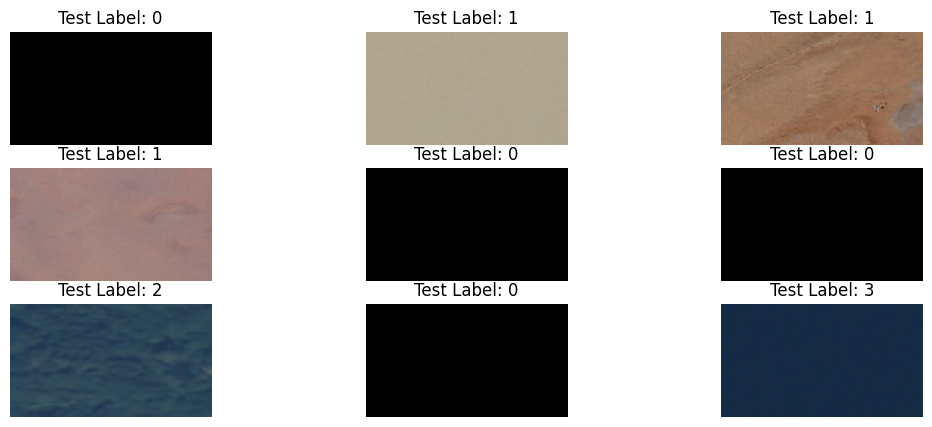

In [18]:
# Print the first few test images
plt.figure(figsize=(13, 5))
for i, (images, labels) in enumerate(test.take(1)):
    for j in range(9):
        ax = plt.subplot(3, 3, j+1)
        plt.imshow(images[j].numpy().astype("uint8"))
        plt.title(f"Test Label: {labels[j].numpy()}")
        plt.axis("off")
plt.show()

In [19]:
# Number of classes available
number_classes = len(set(label for _, labels in train for label in labels.numpy()))
print(f"The number of classes is {number_classes}")

The number of classes is 4


In [20]:
classes = {
    0: "cloudy",
    1: "desert",
    2: "water",
    3: "green_area"
}

In [21]:
model = tf.keras.models.Sequential([
    layers.Input(shape=(height, width, 3)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(300, kernel_initializer="he_normal", use_bias=False),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(100, kernel_initializer="he_normal"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation("relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [22]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 27648)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 300)            │     8,294,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 300)            │         1,200 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 300)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 100)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,327,110 (31.77 MB)

 Trainable params: 8,326,310 (31.76 MB)

 Non-trainable params: 800 (3.12 KB)

In [23]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [24]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [25]:
history = model.fit(train, validation_data=test, epochs=20)

Epoch 1/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - accuracy: 0.8301 - loss: 0.5704 - val_accuracy: 0.7025 - val_loss: 0.7142
Epoch 2/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9158 - loss: 0.2106 - val_accuracy: 0.8348 - val_loss: 0.3159
Epoch 3/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9155 - loss: 0.2014 - val_accuracy: 0.8419 - val_loss: 0.3174
Epoch 4/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9219 - loss: 0.1802 - val_accuracy: 0.9156 - val_loss: 0.1845
Epoch 5/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9194 - loss: 0.1852 - val_accuracy: 0.9227 - val_loss: 0.1814
Epoch 6/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9167 - loss: 0.1809 - val_accuracy: 0.9290 - val_loss: 0.1680
Epoch 7/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9245 - loss: 0.1755 - val_accuracy: 0.9352 - val_loss: 0.1611
Epoch 8/20
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9107 - loss: 0.1947 - val_accu